In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel(r"Enter path for dataset")
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


Renaming column names to simpler ones

In [3]:
df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   MentallyIll                                                   334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

Labeling Yes and No and fillings NaN's

In [5]:
df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
df = df.fillna(0)
df = df.iloc[1:]

In [6]:
df.rename(columns={"Annual income (including any social welfare programs) in USD":"Income"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 1 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    333 non-null    int64  
 1   MentallyIll                                                   333 non-null    int64  
 2   Education                                                     333 non-null    object 
 3   I have my own computer separate from a smart phone            333 non-null    int64  
 4   I have been hospitalized before for my mental illness         333 non-null    int64  
 5   How many days were you hospitalized for your mental illness   333 non-null    float64
 6   I am legally disabled                                         333 non-null    int64  
 7   I have my regular access to the internet                      333 non-n

Labeling encoding columns

In [7]:
df2 = df
df2 = df2.iloc[:, :-3]
df2 = df2.replace(['Lack of concentration','Anxiety', 'Depression', 
                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior', 
                   'Mood swings', 'Tiredness'], 1)
df2 = df2.replace(to_replace=['Female', 'Male'], value=[0, 1])
df2 = df2.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])
df2 = df2.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some\xa0Masters', 
                              'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool']
                              , value=[7, 6, 5, 4, 3, 2, 1, 0])

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 1 to 333
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    333 non-null    int64  
 1   MentallyIll                                                   333 non-null    int64  
 2   Education                                                     333 non-null    int64  
 3   I have my own computer separate from a smart phone            333 non-null    int64  
 4   I have been hospitalized before for my mental illness         333 non-null    int64  
 5   How many days were you hospitalized for your mental illness   333 non-null    float64
 6   I am legally disabled                                         333 non-null    int64  
 7   I have my regular access to the internet                      333 non-n

In [9]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [10]:
from matplotlib import pyplot as plt

In [11]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve

In [12]:
columns=df2.columns
columns=list(columns)
columns.remove("MentallyIll")
X=df2[columns]
y=df2["MentallyIll"]

In [13]:
xtr,xtes,ytr,ytes=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
model=RandomForestClassifier(max_depth=15,random_state=42)
model.fit(xtr,ytr)
pred = cross_val_predict(model, xtr, ytr, cv=3)

print("Score of the model is:",model.score(xtes,ytes))
print("precision of the model is:",precision_score(ytr,pred))
print("recall of the model is:",recall_score(ytr,pred))

Score of the model is: 0.8208955223880597
precision of the model is: 0.7910447761194029
recall of the model is: 0.828125


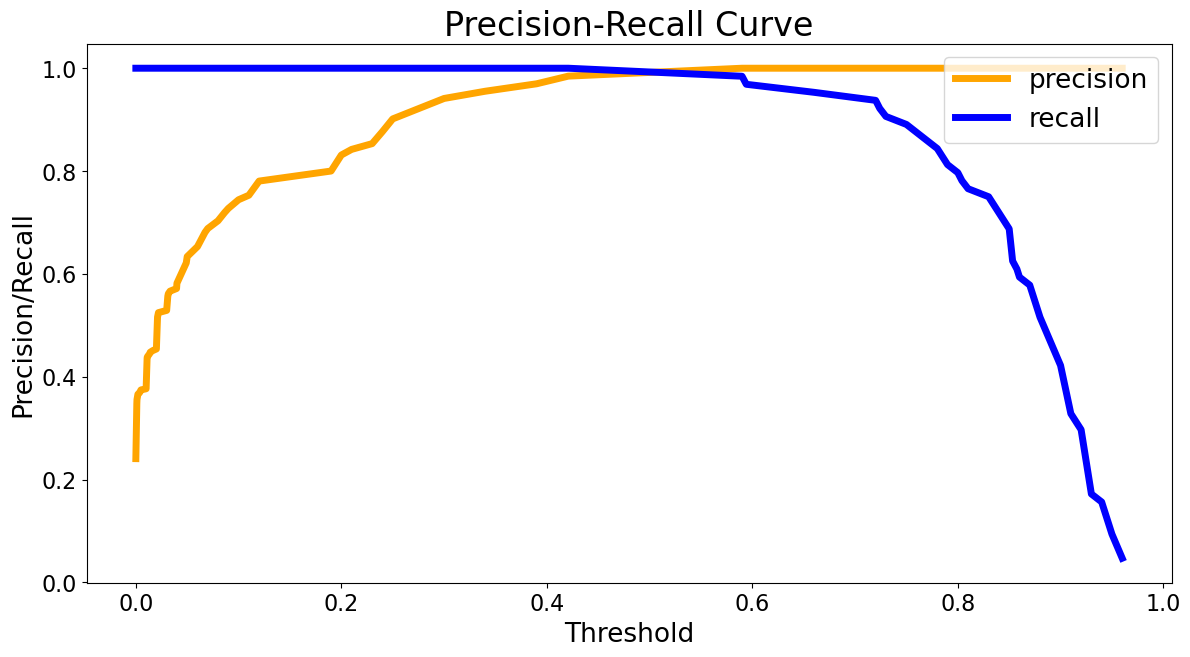

In [15]:
y_scores = model.predict_proba(xtr)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(ytr, y_scores)

plt.figure(figsize=(14, 7))

plt.plot(threshold, precision[:-1], "orange", label="precision", linewidth=5)
plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)

plt.xlabel("Threshold", fontsize=19)
plt.ylabel("Precision/Recall", fontsize=19)
plt.title('Precision-Recall Curve', fontsize=24)

plt.tick_params(labelsize=16)

plt.legend(loc="upper right", fontsize=19)
plt.show()

In [16]:
def menill(x_record):
    x_patient = pd.Series(x_record)
    x_patient = x_patient.fillna(0)
    x_patient = x_patient.replace(to_replace=["No","Yes"],value=[0,1])
    x_patient = x_patient.replace(['Lack of concentration','Anxiety', 'Depression', 
                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior', 
                   'Mood swings', 'Tiredness'], 1)
    x_patient = x_patient.replace(to_replace=['Female', 'Male'], value=[0, 1])
    x_patient = x_patient.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])
    x_patient = x_patient.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some\xa0Masters', 
                              'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool']
                              , value=[7, 6, 5, 4, 3, 2, 1, 0])
    x_pat=np.array(x_patient).reshape(1,-1)
    y_pred=model.predict(x_pat)
    if(y_pred == 1):
        print("Consultation is advised")
    else:
        print("Consultation depends on users feelings")
    

In [17]:
import joblib
joblib.dump(model,"rfmodel.pkl")

['rfmodel.pkl']

In [20]:
responses = []

responses.append(input("Education ('Completed Phd', 'Some Phd', 'Completed Masters','Some Masters', 'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool'): "))
responses.append(input("I have my own computer separate from a smart phone (Yes/No): "))
responses.append(input("I have been hospitalized before for my mental illness (Yes/No): "))
responses.append(input("How many days were you hospitalized for your mental illness (Open-Ended Response): "))
responses.append(input("I am currently employed at least part-time (Yes/No): "))
responses.append(input("I am legally disabled (Yes/No): "))
responses.append(input("I have my regular access to the internet (Yes/No): "))
responses.append(input("I live with my parents (Yes/No): "))
responses.append(input("I have a gap in my resume (Yes/No): "))
responses.append(input("Total length of any gaps in my resume in months (Open-Ended Response): "))
responses.append(input("Annual income (including any social welfare programs) in USD (Open-Ended Response): "))
responses.append(input("I am unemployed (Yes/No): "))
responses.append(input("I read outside of work and school (Yes/No): "))
responses.append(input("Annual income from social welfare programs (Open-Ended Response): "))
responses.append(input("I receive food stamps (Yes/No): "))
responses.append(input("I am on section 8 housing (Yes/No): "))
responses.append(input("How many times were you hospitalized for your mental illness (Open-Ended Response): "))
responses.append(input("I have one of the following issues in addition to my illness (Lack of concentration):"))
responses.append(input("Anxiety:"))
responses.append(input("Depression:"))
responses.append(input("Obsessive thinking:"))
responses.append(input("Mood swings:"))
responses.append(input("Panic attacks:"))
responses.append(input("Compulsive behavior:"))
responses.append(input("Tiredness: "))
responses.append(input("Age : "))
responses.append(input("Gender: "))

print("The result is,:")
menill(responses)

Education ('Completed Phd', 'Some Phd', 'Completed Masters','Some Masters', 'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool'): Some Undergraduate
I have my own computer separate from a smart phone (Yes/No): Yes
I have been hospitalized before for my mental illness (Yes/No): No
How many days were you hospitalized for your mental illness (Open-Ended Response): 0
I am currently employed at least part-time (Yes/No): Yes
I am legally disabled (Yes/No): No
I have my regular access to the internet (Yes/No): Yes
I live with my parents (Yes/No): No
I have a gap in my resume (Yes/No): No
Total length of any gaps in my resume in months (Open-Ended Response): 0
Annual income (including any social welfare programs) in USD (Open-Ended Response): 100000
I am unemployed (Yes/No): No
I read outside of work and school (Yes/No): Yes
Annual income from social welfare programs (Open-Ended Response): 0
I receive food stamps (Yes/No): No
I am on section 8 housing (Yes/

C:\Users\91811\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
